In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm 
from statsmodels.formula.api import ols, logit, glm

In [4]:
df = pd.read_excel('./df.xlsx')

---

**교차분석(x^2 검정)**
- 독립변인과 종속변인이 모두 명목척도 혹은 서열척도로 측정한 불연속 변인일 때 적용하는 통계방법
- 사례에서 응답자의 '사용브랜드'에 따라 '월수입'에 차이가 있는지, 그리고 '성별'에 따라 '구매장소'에 차이가 있는지를 분석
- 이 경우 독립변인인 '성별'과 '사용브랜드', 그리고 종속적인 '구매장소'는 모두 명목척도로 측정한 불연속 변인이다.
- 관찰빈도 O와 기대빈도 E의 차이를 제곱한 후 기대빈도로 나눈 값을 합산한 값이 **카이제곱값(x^2)**이다.
- <u>카이제곱 값이 유의미한 차이가 있는 것으로 나타나면 독립변인에 따른 종속변인의 빈도분포가 통계적으로 차이가 있다고 간주한다.</u>

In [7]:
pd.crosstab(df['월수입'],df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [19]:
chisquare(df['월수입'],df['사용브랜드'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.4748010610079576

오류가 발생하기 때문에, 사용브랜드의 값을 직접 입력해주는 방법으로 진행한다.

In [21]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [25]:
chisquare(df['월수입'],ddof=[1,2]) 
# 사용브랜드의 값은 1,2 임. ddof(adjustment to the degrees of freedom)에 값을 입력. 이는 사용브랜드에 따라 월수입 차이가 있는가?를 뜻함.

Power_divergenceResult(statistic=196.2733118971061, pvalue=array([0.99491356, 0.99418686]))

카이제곱값이 196.27로 95% 유의수준에서 통계적으로 유의미한 차이가 없는 것으로 해석할 수 있다.

In [12]:
pd.crosstab(df['구매장소'],df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [23]:
df['성별'].value_counts()

0    126
1    126
Name: 성별, dtype: int64

In [16]:
chisquare(df['구매장소'],ddof=[0,1]) # 성별의 값은 0,1 임. 이는 성별에 따라 구매장소 차이가 있는가?를 뜻함.

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

카이제곱값이 148.31로 95% 유의수준에서 통계적으로 유의미한 차이가 없는 것으로 해석할 수 있다.

---

**T 검정**
- 독립변인이 불연속변인이고 종속변인이 연속변인일 때 적용하는데, 독립변인의 집단이 2개일 때만 적용한다.
- 사례에서 명목변인인 '사용브랜드'(삼성,애플)에 따라 비율변인인 '구매가격'과 등간변인인 '재구매의향'에 통계적으로 의미있는 차이가 있는가를 분석한다.
- 독립표본 검정을 할 때는 독립변인의 두 집단 사이에 균등하게 분산이 이루어졌는가를 먼저 검정한다.

In [5]:
mean = df['구매가격'].values                       # 평균 비교
mean1 = df[df['사용브랜드']==1].구매가격.values     # 삼성
mean2 = df[df['사용브랜드']==2].구매가격.values     # 애플

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


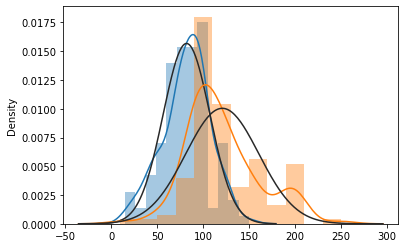

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [6]:
%matplotlib inline

sns.distplot(mean1,kde=True, fit=sp.stats.norm)
sns.distplot(mean2,kde=True, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1) # H0: Normal Distribution을 따름, Return(W,P-value)


In [27]:
sp.stats.levene(mean1, mean2)   # H0: Normal Distribution을 따름. Return(W,P-value)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [28]:
stats.ttest_ind(mean1,mean2,equal_var=False) # 독립변수 2

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

**사용브랜드에 따른 구매가격의 차이**를 검정할 때 삼성, 애플 브랜드를 사용하는 응답자 사이에 등분산 가정이 충족되는가를 검증한 결과 레벤(Levene) 검정결과 값이 13.44로 통계적으로 유의미한 차이가 있었다.(p=.00)
따라서, 등분산가정을 전제하지 않고 검정한 t값은 -9.20로 통계적으로 유의미한 차이가 있다고 해석된다.